In [1]:
!pip install scikit-learn pandas matplotlib seaborn


In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target

# 0 = malignant, 1 = benign
df['diagnosis'] = df['diagnosis'].map({0: 'malignant', 1: 'benign'})


In [5]:
import numpy as np

# Map diagnosis to simulated priority
def assign_priority(row):
    if row['diagnosis'] == 'malignant':
        return 'high'
    elif row[data.feature_names[0]] > df[data.feature_names[0]].median():  # simulate 'medium'
        return 'medium'
    else:
        return 'low'

df['priority'] = df.apply(assign_priority, axis=1)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features and labels
X = df[data.feature_names]
y = df['priority']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [8]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

# F1 Score (macro for multiclass)
f1 = f1_score(y_test, y_pred, average='macro')

# Classification Report
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print("\nClassification Report:\n", report)


Accuracy: 0.9737
F1 Score (macro): 0.9656

Classification Report:
               precision    recall  f1-score   support

        high       0.98      0.95      0.96        43
         low       1.00      0.98      0.99        55
      medium       0.89      1.00      0.94        16

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



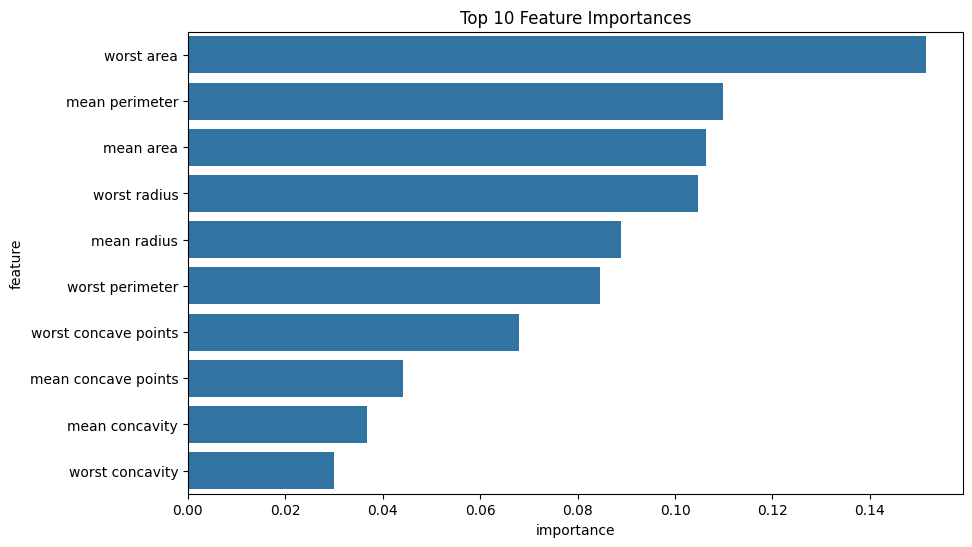

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importance = model.feature_importances_
feat_df = pd.DataFrame({'feature': data.feature_names, 'importance': importance})
feat_df = feat_df.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_df)
plt.title('Top 10 Feature Importances')
plt.show()
